In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [19]:
data = pd.read_csv("extendedData.csv")

In [20]:
data.head()

,Unnamed: 0,id,city,DOB,address,longitude,sex,state,latitude,name,...,R04.2,G47.33,R00.0,R19.7,E11.65,B20.1,M05.10,F14.121,F10.121,N18.9
0,0,1,Sanders,1996-07-08T22:11:38Z,316 CROUCH STREET,-109,F,Arizona,35,"MOS,JERN M",...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,10,Tsaile,1999-05-08T22:11:38Z,1480 E 23RD,-109,M,Arizona,36,"KLUTSCH,NELIDA Z",...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,100,Quartzsite,1997-11-08T22:11:38Z,5156 N WEST,-114,M,Arizona,34,"POLITOVICH,ACHAEE A",...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,1000,Santa Barbara,1998-03-08T22:11:38Z,7020 TRISTAN CIRCLE,-120,M,California,34,"FLORES RIVERA,JERUZ D",...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,10000,Buffalo,1997-10-08T22:11:38Z,3925 SACRAMENTO ST405,-107,M,Wyoming,44,"BUCKNER,SANAE",...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
data.iloc[2]

Unnamed: 0                             2
id                                   100
city                          Quartzsite
DOB                 1997-11-08T22:11:38Z
address                      5156 N WEST
longitude                           -114
sex                                    M
state                            Arizona
latitude                              34
name                 POLITOVICH,ACHAEE A
PEOPLE_COVERED                         1
OPTIONAL_INSURED                  800000
ANNUAL_INCOME                     200000
MARITAL_STATUS                         S
HEIGHT                                76
WEIGHT                               158
TOBACCO                               No
collection_id                   v_quotes
GOLD                                  80
BRONZE                                30
SILVER                                50
PLATINUM                             120
PURCHASED                         Silver
S62.308                                1
G80.4           

In [22]:
# Convert SILVER values to ints and drop NA

# data["SILVER"] = pd.to_numeric(data["SILVER"], errors="coerce")
# for i in range(len(data[""])):
#     if np.isnan(data.iloc[i]["SILVER"]):
#         data.at[i, "SILVER"] = (data.iloc[i]["BRONZE"] + data.iloc[i]["GOLD"]) / 2
#         print(data.iloc[i]["SILVER"])
# data["SILVER"] = data["SILVER"].astype(int)

In [23]:
def tobaccoConv(x):
    if x.lower() == "yes":
        return True
    if x.lower() == "no":
        return False
    return np.nan

data["TOBACCO"] = data["TOBACCO"].apply(lambda row: tobaccoConv (row))

In [24]:
# Clean silver data of NAs

data["SILVER"] = pd.to_numeric(data["SILVER"], errors="coerce")
data["PLATINUM"] = pd.to_numeric(data["PLATINUM"], errors="coerce")
data["WEIGHT"] = pd.to_numeric(data["WEIGHT"], errors="coerce")

In [25]:
data = data.dropna()

In [26]:
def avgCost(x):
    return int((x["BRONZE"] + x["SILVER"] + x["GOLD"] + x["PLATINUM"]) / 4)

data["AVGCOST"] = data.apply(lambda row: avgCost(row), axis=1)

In [27]:
def riskCounter(x):
    return int(x["B20.1"] + x["E11.65"] + x["F10.121"] + x["F14.121"] + \
        x["G47.33"] + x["G80.4"] + x["M05.10"] + x["N18.9"] + \
        x["R00.0"] + x["R00.8"] + x["R04.2"] + x["R19.7"] + \
        x["S62.308"] + x["T84.011"] + x["T85.622"] + x["Z91.010"])

data["RISK_FACTOR"] = data.apply(lambda row: riskCounter(row), axis=1)

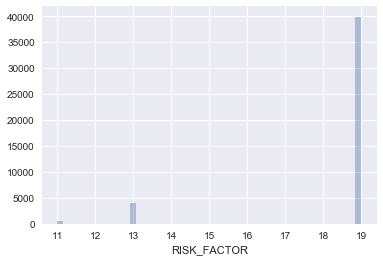

In [41]:
sns.set()
sns.distplot(data["RISK_FACTOR"], kde=False)

# Bronze

(0, 150)

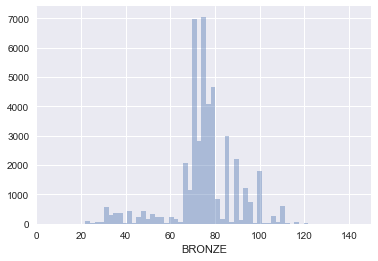

In [42]:
sns.distplot(data["BRONZE"], kde=False)
plt.xlim(0, 150)

(0, 200)

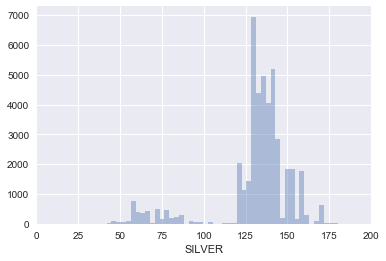

In [43]:
sns.distplot(data["SILVER"], kde=False)
plt.xlim(0, 200)

(0, 300)

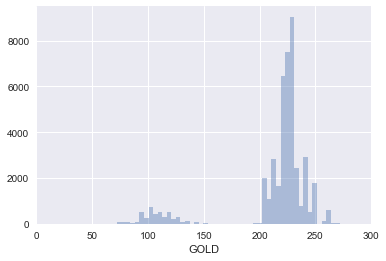

In [44]:
sns.distplot(data["GOLD"], kde=False)
plt.xlim(0, 300)

(0, 450)

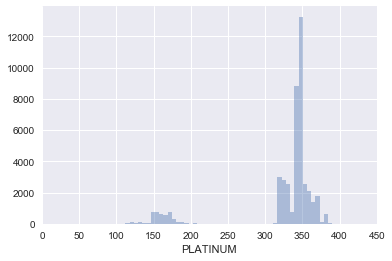

In [45]:
sns.distplot(data["PLATINUM"], kde=False)
plt.xlim(0, 450)

(0, 250)

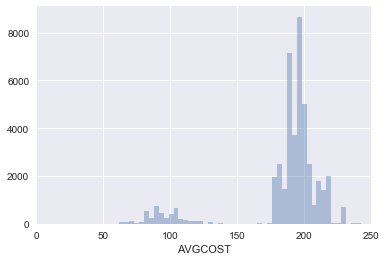

In [46]:
sns.distplot(data["AVGCOST"], kde=False)
plt.xlim(0, 250)

(0, 420)

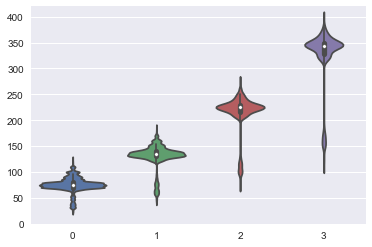

In [47]:
sns.violinplot(data=[data["BRONZE"], data["SILVER"], data["GOLD"], data["PLATINUM"]])
plt.ylim(0, 420)

In [48]:
data["BRONZE"].count()

44384

In [49]:
sample = data.sample(n=1000)

In [50]:
pairplot(sample[["TOBACCO", "WEIGHT", "BRONZE", "AVGCOST"]], hue="TOBACCO")

NameError: name 'pairplot' is not defined